# **Swarm Robotics Competitions**

### 2021/2022      

## A. Pedro Aguiar
<pedro.aguiar@fe.up.pt>
<br>

<br> FEUP Nov. 2021

**Initial setup:**
To run this notebook you need to, first, download our python dynamic system module [here](https://drive.google.com/file/d/1SMsjnt2NHRyV1wXZ6IAt_HwDXHCnUDAN/view?usp=sharing), then you need to go to the colab pallete (left)-> file-> upload to session storage, and select the file dynamic_system.py that you just downloaded.


# 4 - Motion control of a swarm of agents



### **A swarm of multiple single integrator dynamics**


Consider a fleet of n=5 agents (robots), where each agent satisfies the following dynamics

$$
\dot x_i=u_i, \quad i=1, 2,\ldots n
$$

Suppose that the agents are only able to communicate to each other, according to the following graph topology:

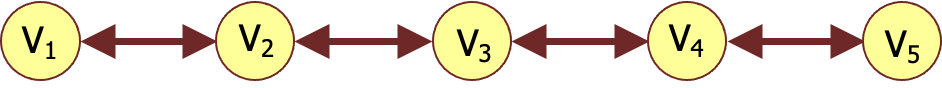

### **The *rendezvous* problem**

One way to solve the *rendezvous* problem is to use the consensus protocol

$$
u_i = -k\sum_{j\in N_i}(x_i-x_j), \quad i=1, 2,\ldots n
$$
where $k>0$ is a positive gain.

Note that the agents will converge to the mean of their initial conditions, that is, $\lim_{t\to\infty}x_i(t) = \frac{1}{n}\sum x_i(0)$.

Let's check this.

In [ ]:
import math
import numpy as np
from dynamic_systems import Integrator

# Dynamics: States=[x] Control=[u] where x_dot=u
initial_state1 = [2.0]
initial_control1 = [0.0]
robot1 = Integrator(initial_state1, initial_control1)

initial_state2 = [2.0]
initial_control2 = [0.0]
robot2 = Integrator(initial_state2, initial_control2)

initial_state3 = [0.0]
initial_control3 = [0.0]
robot3 = Integrator(initial_state3, initial_control3)

initial_state4 = [-1.0]
initial_control4 = [0.0]
robot4 = Integrator(initial_state4, initial_control4)

initial_state5 = [-2.0]
initial_control5 = [0.0]
robot5 = Integrator(initial_state5, initial_control5)

#Gain
k=1

dt = 0.01      # This is my sampling time
sim_time = 10  # This is my final time of the simulation
time = []
u1, x1 = [], []
u2, x2 = [], []
u3, x3 = [], []
u4, x4 = [], []
u5, x5 = [], []

for t in np.linspace(0.0, sim_time, num=int(sim_time/dt)):

    # Time
    time.append(t)
    
    # Get the position of the robot
    state1 = robot1.get_state()
    state2 = robot2.get_state()
    state3 = robot3.get_state()
    state4 = robot4.get_state()
    state5 = robot5.get_state()

    # Control    Here is where I define my control signal
    u_control1 = -k*(state1-state2)
    u_control2 = -k*((state2-state1)+(state2-state3))
    u_control3 = -k*((state3-state2)+(state3-state4))
    u_control4 = -k*((state4-state3)+(state4-state5))
    u_control5 = -k*(state5-state4)

    
    # Send actuation commands
    robot1.set_control(u_control1)
    robot1.actuate(dt)
    robot2.set_control(u_control2)
    robot2.actuate(dt)
    robot3.set_control(u_control3)
    robot3.actuate(dt)
    robot4.set_control(u_control4)
    robot4.actuate(dt)
    robot5.set_control(u_control5)
    robot5.actuate(dt)


    u1.append(u_control1)
    x1.append(state1)
    u2.append(u_control2)
    x2.append(state2)
    u3.append(u_control3)
    x3.append(state3)
    u4.append(u_control4)
    x4.append(state4)
    u5.append(u_control5)
    x5.append(state5)


ModuleNotFoundError: ignored

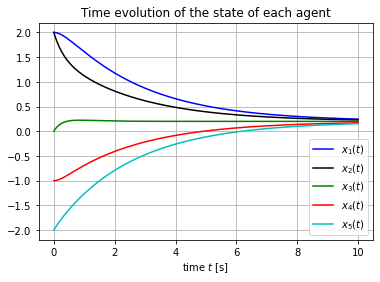

In [ ]:
%matplotlib inline 
# The command above will lead to static images of your plot embedded in the notebook

# You can try instead th enext one that will lead to interactive plots embedded within the notebook (but is seems to not work in colab!)
#%matplotlib notebook

import matplotlib.pyplot as plt

# Plot commands

plt.figure()
plt.plot(time, x1, label='$x_1(t)$', color='b')
plt.plot(time, x2, label='$x_2(t)$', color='k')
plt.plot(time, x3, label='$x_3(t)$', color='g')
plt.plot(time, x4, label='$x_4(t)$', color='r')
plt.plot(time, x5, label='$x_5(t)$', color='c')

plt.xlabel('time $t$ [s]');
plt.legend()
plt.grid()
plt.title('Time evolution of the state of each agent');



**Activity 1.** Go above and try with different initial conditions of the states $x_i(0)$ and different gain $k>0$.

### What happens if the graph is not connected?

Let's when there is no link between agent 2 and 3

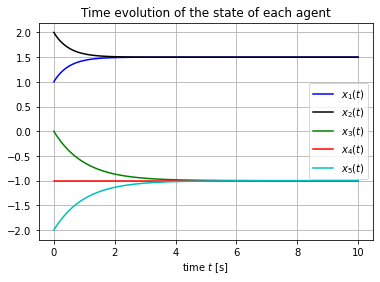

In [ ]:
import math
import numpy as np
from dynamic_systems import Integrator

# Dynamics: States=[x] Control=[u] where x_dot=u
initial_state1 = [1.0]
initial_control1 = [0.0]
robot1 = Integrator(initial_state1, initial_control1)

initial_state2 = [2.0]
initial_control2 = [0.0]
robot2 = Integrator(initial_state2, initial_control2)

initial_state3 = [0.0]
initial_control3 = [0.0]
robot3 = Integrator(initial_state3, initial_control3)

initial_state4 = [-1.0]
initial_control4 = [0.0]
robot4 = Integrator(initial_state4, initial_control4)

initial_state5 = [-2.0]
initial_control5 = [0.0]
robot5 = Integrator(initial_state5, initial_control5)

#Gain
k=1

dt = 0.01      # This is my sampling time
sim_time = 10  # This is my final time of the simulation
time = []
u1, x1 = [], []
u2, x2 = [], []
u3, x3 = [], []
u4, x4 = [], []
u5, x5 = [], []

for t in np.linspace(0.0, sim_time, num=int(sim_time/dt)):

    # Time
    time.append(t)
    
    # Control    Here is where I define my control signal
    state1 = robot1.get_state()
    state2 = robot2.get_state()
    state3 = robot3.get_state()
    state4 = robot4.get_state()
    state5 = robot5.get_state()


    u_control1 = -k*(state1-state2)
    u_control2 = -k*(state2-state1)
    u_control3 = -k*(state3-state4)
    u_control4 = -k*((state4-state3)+(state4-state5))
    u_control5 = -k*(state5-state4)

    
    # Send actuation commands
    robot1.set_control(u_control1)
    robot1.actuate(dt)
    robot2.set_control(u_control2)
    robot2.actuate(dt)
    robot3.set_control(u_control3)
    robot3.actuate(dt)
    robot4.set_control(u_control4)
    robot4.actuate(dt)
    robot5.set_control(u_control5)
    robot5.actuate(dt)


    u1.append(u_control1)
    x1.append(state1)
    u2.append(u_control2)
    x2.append(state2)
    u3.append(u_control3)
    x3.append(state3)
    u4.append(u_control4)
    x4.append(state4)
    u5.append(u_control5)
    x5.append(state5)


# Plot commands

plt.figure()
plt.plot(time, x1, label='$x_1(t)$', color='b')
plt.plot(time, x2, label='$x_2(t)$', color='k')
plt.plot(time, x3, label='$x_3(t)$', color='g')
plt.plot(time, x4, label='$x_4(t)$', color='r')
plt.plot(time, x5, label='$x_5(t)$', color='c')

plt.xlabel('time $t$ [s]');
plt.legend()
plt.grid()
plt.title('Time evolution of the state of each agent');

### 2D case

Consider now 5 agents in the plane $(x,y)$ with single integrator dynamics in each axis, that is,

$$ 
\begin{align}
\dot \xi_i = u_i, \quad i =1, 2, \ldots n
\end{align}
$$

where 
$$
\xi_i = 
\begin{bmatrix} 
x_i \\
y_i
\end{bmatrix} \,, \quad
u_i = 
\begin{bmatrix} 
u_{x_i} \\
u_{y_i} 
\end{bmatrix}
$$

are the 2D state and 2D control for each agent $i$, respectively.

Similarly, the rendezvous controller is now given by

$$
u_i = - K_i \sum_{j\in N_i}(\xi_i-\xi_j), \quad i=1, 2,\ldots n
$$

where $K_i$ is a $2\times 2$ positive-definite matrix gain.

For the same communication topology (graph) we obtain the following.

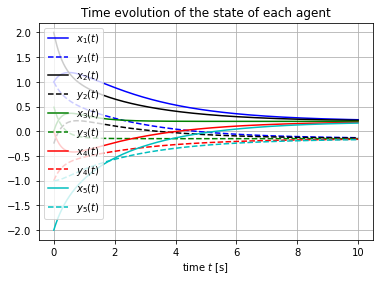

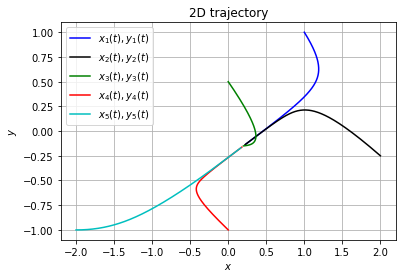

In [ ]:
import math
import numpy as np
from dynamic_systems import Integrator

# Dynamics: States=[xi] Control=[u] where xi_dot=u
initial_state1 = [1.0, 1.0]
initial_control1 = [0.0, 0.0]
robot1 = Integrator(initial_state1, initial_control1)

initial_state2 = [2.0, -0.25]
initial_control2 = [0.0, 0.0]
robot2 = Integrator(initial_state2, initial_control2)

initial_state3 = [0.0, 0.5]
initial_control3 = [0.0, 0.0]
robot3 = Integrator(initial_state3, initial_control3)

initial_state4 = [0.0, -1.0]
initial_control4 = [0.0, 0.0]
robot4 = Integrator(initial_state4, initial_control4)

initial_state5 = [-2.0, -1.0]
initial_control5 = [0.0, 0.0]
robot5 = Integrator(initial_state5, initial_control5)

# Gain matrix
kx, ky = 1, 1
K = np.diag([kx,ky])


dt = 0.01
sim_time = 10
time = []
ux1, uy1 = [], []
x1, y1 = [], []
ux2, uy2 = [], []
x2, y2 = [], []
ux3, uy3 = [], []
x3, y3 = [], []
ux4, uy4 = [], []
x4, y4 = [], []
ux5, uy5 = [], []
x5, y5 = [], []


for t in np.linspace(0.0, sim_time, num=int(sim_time/dt)):

    # Time
    time.append(t)

    # Get the state
    state1 = robot1.get_state()
    state2 = robot2.get_state()
    state3 = robot3.get_state()
    state4 = robot4.get_state()
    state5 = robot5.get_state()

    # Control law
    u_control1 = - K @ (state1 - state2)
    u_control2 = - K @ ((state2 - state1)+(state2-state3))
    u_control3 = - K @ ((state3 - state2)+(state3-state4))
    u_control4 = - K @ ((state4 - state3)+(state4-state5))
    u_control5 = - K @ (state5 - state4)
    
    # Send actuation commands
    robot1.set_control(u_control1)
    robot1.actuate(dt)
    robot2.set_control(u_control2)
    robot2.actuate(dt)
    robot3.set_control(u_control3)
    robot3.actuate(dt)
    robot4.set_control(u_control4)
    robot4.actuate(dt)
    robot5.set_control(u_control5)
    robot5.actuate(dt)    
    
    ux1.append(u_control1[0])
    uy1.append(u_control1[1])
    x1.append(state1[0])
    y1.append(state1[1])
    ux2.append(u_control2[0])
    uy2.append(u_control2[1])
    x2.append(state2[0])
    y2.append(state2[1])
    ux3.append(u_control3[0])
    uy3.append(u_control3[1])
    x3.append(state3[0])
    y3.append(state3[1])
    ux4.append(u_control4[0])
    uy4.append(u_control4[1])
    x4.append(state4[0])
    y4.append(state4[1])
    ux5.append(u_control5[0])
    uy5.append(u_control5[1])
    x5.append(state5[0])
    y5.append(state5[1])

# Plot commands

plt.figure()
plt.plot(time, x1, label='$x_1(t)$', color='b')
plt.plot(time, y1, label='$y_1(t)$', color='b', linestyle='dashed')
plt.plot(time, x2, label='$x_2(t)$', color='k')
plt.plot(time, y2, label='$y_2(t)$', color='k', linestyle='dashed')
plt.plot(time, x3, label='$x_3(t)$', color='g')
plt.plot(time, y3, label='$y_3(t)$', color='g', linestyle='dashed')
plt.plot(time, x4, label='$x_4(t)$', color='r')
plt.plot(time, y4, label='$y_4(t)$', color='r', linestyle='dashed')
plt.plot(time, x5, label='$x_5(t)$', color='c')
plt.plot(time, y5, label='$y_5(t)$', color='c', linestyle='dashed')

plt.xlabel('time $t$ [s]');
plt.legend()
plt.grid()
plt.title('Time evolution of the state of each agent');

plt.figure()
plt.plot(x1, y1, label='$x_1(t), y_1(t)$', color='b')
plt.plot(x2, y2, label='$x_2(t), y_2(t)$', color='k')
plt.plot(x3, y3, label='$x_3(t), y_3(t)$', color='g')
plt.plot(x4, y4, label='$x_4(t), y_4(t)$', color='r')
plt.plot(x5, y5, label='$x_5(t), y_5(t)$', color='c')
plt.legend()
plt.grid()
plt.xlabel('$x$');
plt.ylabel('$y$');
plt.title('2D trajectory');

**Activity 2.** Go above and try with different initial conditions of the state $x(0)$ and different input signals $u(t)$.


### **Following a leader**


Consider now that agent $1$ is assigned to be the leader of the formation, and suppose that its goal is to track a given referense trajectory $\xi_d(t)$.

From the notebook "*Motion control of a single agent*", the feedback controller is given by

$$
u_1 = - K_1 (\xi_1-\xi_d) + \dot \xi_d
$$

where $K_1$ is a $2\times 2$ positive-definite matrix gain.





To make sure that the other agents follow the leader, we set 

$$
u_i = - K_i \sum_{j\in N_i}\big((\xi_i-\xi_j) -b_{ij}\big) + \dot \xi_d, \quad i=2, 3,\ldots n
$$

where $K_i$ is a $2\times 2$ positive-definite matrix gain, and the bias terms $b_{ij}= -b_{ji}$ specifies the formation configuration.

Let's see the case when 
$$
\xi_d(t) = \left\{
\begin{array}{l,l}
(0,0), &0\le t< 5 \\
(5,0), &t \ge 5
\end{array}\right.
$$

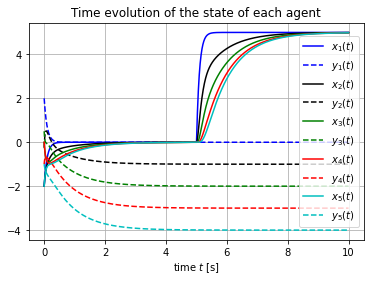

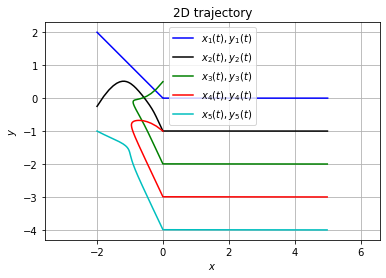

In [ ]:
import math
import numpy as np
from dynamic_systems import Integrator

# Dynamics: States=[xi] Control=[u] where xi_dot=u
initial_state1 = [-2.0, 2.0]
initial_control1 = [0.0, 0.0]
robot1 = Integrator(initial_state1, initial_control1)

initial_state2 = [-2.0, -0.25]
initial_control2 = [0.0, 0.0]
robot2 = Integrator(initial_state2, initial_control2)

initial_state3 = [0.0, 0.5]
initial_control3 = [0.0, 0.0]
robot3 = Integrator(initial_state3, initial_control3)

initial_state4 = [0.0, -1.0]
initial_control4 = [0.0, 0.0]
robot4 = Integrator(initial_state4, initial_control4)

initial_state5 = [-2.0, -1.0]
initial_control5 = [0.0, 0.0]
robot5 = Integrator(initial_state5, initial_control5)

# Gain matrix
kx, ky = 10, 10
K = np.diag([kx,ky])


b12 = [0.0, 1.0]
b23 = [0.0, 1.0]
b34 = [0.0, 1.0]
b45 = [0.0, 1.0]

dt = 0.01
sim_time = 10
time = []
ux1, uy1 = [], []
x1, y1 = [], []
ux2, uy2 = [], []
x2, y2 = [], []
ux3, uy3 = [], []
x3, y3 = [], []
ux4, uy4 = [], []
x4, y4 = [], []
ux5, uy5 = [], []
x5, y5 = [], []
xdv, ydv = [], []


for t in np.linspace(0.0, sim_time, num=int(sim_time/dt)):

    # Time
    time.append(t)

    # Reference signal
#    xid = 10*np.array([ math.sin(t), math.cos(t) ])
#    dot_xid = 10*np.array([ math.cos(t), -math.sin(t) ])
    xid = 5*np.array([ np.heaviside(t-5,1.0), 0 ])
    dot_xid = (0,0)

    # Get the state
    state1 = robot1.get_state()
    state2 = robot2.get_state()
    state3 = robot3.get_state()
    state4 = robot4.get_state()
    state5 = robot5.get_state()

    # Control law
    u_control1 = - K @ ( state1 - xid ) + dot_xid
#    u_control1 = (0,0)
    u_control2 = - K @ (((state2 - state1)+b12)+((state2-state3)-b23)) + dot_xid
    u_control3 = - K @ (((state3 - state2)+b23)+((state3-state4)-b34)) + dot_xid
    u_control4 = - K @ (((state4 - state3)+b34)+((state4-state5)-b45)) + dot_xid
    u_control5 = - K @ ((state5 - state4)+b45) + dot_xid
    
    # Send actuation commands
    robot1.set_control(u_control1)
    robot1.actuate(dt)
    robot2.set_control(u_control2)
    robot2.actuate(dt)
    robot3.set_control(u_control3)
    robot3.actuate(dt)
    robot4.set_control(u_control4)
    robot4.actuate(dt)
    robot5.set_control(u_control5)
    robot5.actuate(dt)    
    
    ux1.append(u_control1[0])
    uy1.append(u_control1[1])
    x1.append(state1[0])
    y1.append(state1[1])
    ux2.append(u_control2[0])
    uy2.append(u_control2[1])
    x2.append(state2[0])
    y2.append(state2[1])
    ux3.append(u_control3[0])
    uy3.append(u_control3[1])
    x3.append(state3[0])
    y3.append(state3[1])
    ux4.append(u_control4[0])
    uy4.append(u_control4[1])
    x4.append(state4[0])
    y4.append(state4[1])
    ux5.append(u_control5[0])
    uy5.append(u_control5[1])
    x5.append(state5[0])
    y5.append(state5[1])

# Plot commands

plt.figure()
plt.plot(time, x1, label='$x_1(t)$', color='b')
plt.plot(time, y1, label='$y_1(t)$', color='b', linestyle='dashed')
plt.plot(time, x2, label='$x_2(t)$', color='k')
plt.plot(time, y2, label='$y_2(t)$', color='k', linestyle='dashed')
plt.plot(time, x3, label='$x_3(t)$', color='g')
plt.plot(time, y3, label='$y_3(t)$', color='g', linestyle='dashed')
plt.plot(time, x4, label='$x_4(t)$', color='r')
plt.plot(time, y4, label='$y_4(t)$', color='r', linestyle='dashed')
plt.plot(time, x5, label='$x_5(t)$', color='c')
plt.plot(time, y5, label='$y_5(t)$', color='c', linestyle='dashed')

plt.xlabel('time $t$ [s]');
plt.legend()
plt.grid()
plt.title('Time evolution of the state of each agent');

plt.figure()
plt.plot(x1, y1, label='$x_1(t), y_1(t)$', color='b')
plt.plot(x2, y2, label='$x_2(t), y_2(t)$', color='k')
plt.plot(x3, y3, label='$x_3(t), y_3(t)$', color='g')
plt.plot(x4, y4, label='$x_4(t), y_4(t)$', color='r')
plt.plot(x5, y5, label='$x_5(t), y_5(t)$', color='c')
plt.axis('equal')
plt.legend()
plt.grid()
plt.xlabel('$x$');
plt.ylabel('$y$');
plt.title('2D trajectory');

#plt.figure()
#plt.plot(time, np.subtract(x1,x2), label='$x_1-x_2$', color='b')

**Activity 3.** Go above and try:

1.   Other (positive) values for the gains
2.   Different initial conditions $\xi_i(0)$
3. Different reference signals $\xi_d(t)$


### **How to avoid collision between the agents and one obstacle?**

We start to impose obstacle avoidance for the leader. From the notebook "*Motion control of a single agent*", it follows that 

$$
u_1 = - K_1 (\xi_1-\xi_d) + \frac{k_{1o}(d_1)}{d_1^2} ( \xi_1 - \xi_o ) + \dot{\xi}_d
$$
where
$$
k_{1o}(d) = \bar k_{1o}e^{-c d_1^2}, \quad d_1 = ||\xi_1 - \xi_o ||-r,
$$
$\xi_o$ and $r$ are the center position of the obstacle and radius, respectively, and $k_{1o}, c$ are positive gains.





For the other agents, we have to add the repulsive terms to avoid collision between the agents and the obstacle. In this case , we obtain 

$$
u_i = - K_i \sum_{j\in N_i}\big((\xi_i-\xi_j) -b_{ij}\big) + \sum_{j= 1}^n \frac{k_{ij}(d_{ij})}{d_{ij}^2} ( \xi_i - \xi_j )+ \frac{k_{io}(d_i)}{d_{io}^2} ( \xi_1 - \xi_o ) +
\dot \xi_d, \quad i=2, 3,\ldots n
$$

$$
d_{ij} = ||\xi_i - \xi_j ||, \quad
d_{io} = ||\xi_i - \xi_o ||-r
$$


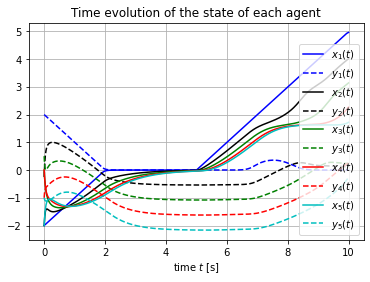

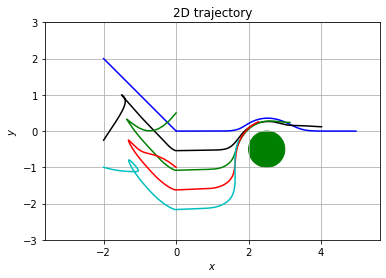

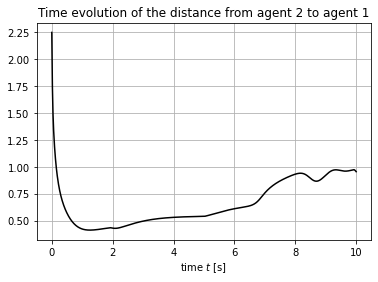

In [ ]:
import math
import numpy as np
from dynamic_systems import Integrator

# Dynamics: States=[xi] Control=[u] where xi_dot=u
initial_state1 = [-2.0, 2.0]
initial_control1 = [0.0, 0.0]
robot1 = Integrator(initial_state1, initial_control1)

initial_state2 = [-2.0, -0.25]
initial_control2 = [0.0, 0.0]
robot2 = Integrator(initial_state2, initial_control2)

initial_state3 = [0.0, 0.5]
initial_control3 = [0.0, 0.0]
robot3 = Integrator(initial_state3, initial_control3)

initial_state4 = [0.0, -1.0]
initial_control4 = [0.0, 0.0]
robot4 = Integrator(initial_state4, initial_control4)

initial_state5 = [-2.0, -1.0]
initial_control5 = [0.0, 0.0]
robot5 = Integrator(initial_state5, initial_control5)

# Gain matrix
kx, ky = 10, 10
K = np.diag([kx,ky])

K1o_init = 0.1*K
c = 5
xo = np.array([ 2.5, -0.5 ])
radius = 0.5

K2o_init = 0.1*K
K2j_init = 0.1*K
K3o_init = 0.1*K
K3j_init = 0.1*K
K4o_init = 0.1*K
K4j_init = 0.1*K
K5o_init = 0.1*K
K5j_init = 0.1*K

b12 = [0.0, 0.5]
b23 = [0.0, 0.5]
b34 = [0.0, 0.5]
b45 = [0.0, 0.5]

dt = 0.01
sim_time = 10
time = []
ux1, uy1 = [], []
x1, y1 = [], []
ux2, uy2 = [], []
x2, y2 = [], []
ux3, uy3 = [], []
x3, y3 = [], []
ux4, uy4 = [], []
x4, y4 = [], []
ux5, uy5 = [], []
x5, y5 = [], []
xdv, ydv = [], []


for t in np.linspace(0.0, sim_time, num=int(sim_time/dt)):

    # Time
    time.append(t)

    # Reference signal
#    xid = 10*np.array([ math.sin(t), math.cos(t) ])
#    dot_xid = 10*np.array([ math.cos(t), -math.sin(t) ])
    xid = 5*np.array([ np.heaviside(t-5,1.0), 0 ])
    dot_xid = (0,0)


    # Get the state
    state1 = robot1.get_state()
    state2 = robot2.get_state()
    state3 = robot3.get_state()
    state4 = robot4.get_state()
    state5 = robot5.get_state()

    # Control law
    d1o = np.linalg.norm(state1 - xo) - radius    
    u_control1 = - K @ ( state1 - xid ) + (1/d1o**2)*K1o_init*np.exp(-c*d1o**2) @ ( state1 - xo ) + dot_xid
#    u_control1 = - K @ ( state1 - xid ) + dot_xid
#    u_control1 = (0,0)
    u_control1 = np.clip(u_control1, -1, 1)

    d2o = np.linalg.norm(state2 - xo) - radius    
    d21 = np.linalg.norm(state2 - state1)    
    d23 = np.linalg.norm(state2 - state3)    
    d24 = np.linalg.norm(state2 - state4)    
    d25 = np.linalg.norm(state2 - state5)    
    u_control2 = - K @ (((state2 - state1)+b12)+((state2-state3)-b23)) \
    + (1/d21**2)*K2j_init*np.exp(-c*d21**2) @ ( state2 - state1 ) \
    + (1/d23**2)*K2j_init*np.exp(-c*d23**2) @ ( state2 - state3 ) \
    + (1/d24**2)*K2j_init*np.exp(-c*d24**2) @ ( state2 - state4 ) \
    + (1/d25**2)*K2j_init*np.exp(-c*d25**2) @ ( state2 - state5 ) \
    + (1/d2o**2)*K2o_init*np.exp(-c*d2o**2) @ ( state2 - xo ) + dot_xid
#    u_control2 = - K @ (((state2 - state1)+b12)+((state2-state3)-b23)) + dot_xid

    d3o = np.linalg.norm(state3 - xo) - radius    
    d31 = np.linalg.norm(state3 - state1)    
    d32 = np.linalg.norm(state3 - state2)    
    d34 = np.linalg.norm(state3 - state4)    
    d35 = np.linalg.norm(state3 - state5)    
    u_control3 = - K @ (((state3 - state2)+b23)+((state3-state4)-b34)) \
    + (1/d31**2)*K3j_init*np.exp(-c*d31**2) @ ( state3 - state1 ) \
    + (1/d32**2)*K3j_init*np.exp(-c*d32**2) @ ( state3 - state2 ) \
    + (1/d34**2)*K3j_init*np.exp(-c*d34**2) @ ( state3 - state4 ) \
    + (1/d35**2)*K3j_init*np.exp(-c*d35**2) @ ( state3 - state5 ) \
    + (1/d3o**2)*K3o_init*np.exp(-c*d3o**2) @ ( state3 - xo ) + dot_xid
#    u_control3 = - K @ (((state3 - state2)+b23)+((state3-state4)-b34)) + dot_xid

    d4o = np.linalg.norm(state4 - xo) - radius    
    d41 = np.linalg.norm(state4 - state1)    
    d42 = np.linalg.norm(state4 - state2)    
    d43 = np.linalg.norm(state4 - state3)    
    d45 = np.linalg.norm(state4 - state5)    
    u_control4 = - K @ (((state4 - state3)+b34)+((state4-state5)-b45)) \
    + (1/d41**2)*K4j_init*np.exp(-c*d41**2) @ ( state4 - state1 ) \
    + (1/d42**2)*K4j_init*np.exp(-c*d42**2) @ ( state4 - state2 ) \
    + (1/d43**2)*K4j_init*np.exp(-c*d43**2) @ ( state4 - state3 ) \
    + (1/d45**2)*K4j_init*np.exp(-c*d45**2) @ ( state4 - state5 ) \
    + (1/d4o**2)*K4o_init*np.exp(-c*d4o**2) @ ( state4 - xo ) + dot_xid
#    u_control4 = - K @ (((state4 - state3)+b34)+((state4-state5)-b45)) + dot_xid

    d5o = np.linalg.norm(state5 - xo) - radius    
    d51 = np.linalg.norm(state5 - state1)    
    d52 = np.linalg.norm(state5 - state2)    
    d53 = np.linalg.norm(state5 - state3)    
    d54 = np.linalg.norm(state5 - state4)    
    u_control5 = - K @ ((state5 - state4)+b45) \
    + (1/d51**2)*K5j_init*np.exp(-c*d51**2) @ ( state5 - state1 ) \
    + (1/d52**2)*K5j_init*np.exp(-c*d52**2) @ ( state5 - state2 ) \
    + (1/d53**2)*K5j_init*np.exp(-c*d53**2) @ ( state5 - state3 ) \
    + (1/d54**2)*K5j_init*np.exp(-c*d54**2) @ ( state5 - state4 ) \
    + (1/d5o**2)*K5o_init*np.exp(-c*d5o**2) @ ( state5 - xo ) + dot_xid
#    u_control5 = - K @ ((state5 - state4)+b45) + dot_xid
    
    # Send actuation commands
    robot1.set_control(u_control1)
    robot1.actuate(dt)
    robot2.set_control(u_control2)
    robot2.actuate(dt)
    robot3.set_control(u_control3)
    robot3.actuate(dt)
    robot4.set_control(u_control4)
    robot4.actuate(dt)
    robot5.set_control(u_control5)
    robot5.actuate(dt)    
    
    ux1.append(u_control1[0])
    uy1.append(u_control1[1])
    x1.append(state1[0])
    y1.append(state1[1])
    ux2.append(u_control2[0])
    uy2.append(u_control2[1])
    x2.append(state2[0])
    y2.append(state2[1])
    ux3.append(u_control3[0])
    uy3.append(u_control3[1])
    x3.append(state3[0])
    y3.append(state3[1])
    ux4.append(u_control4[0])
    uy4.append(u_control4[1])
    x4.append(state4[0])
    y4.append(state4[1])
    ux5.append(u_control5[0])
    uy5.append(u_control5[1])
    x5.append(state5[0])
    y5.append(state5[1])

# Plot commands

plt.figure()
plt.plot(time, x1, label='$x_1(t)$', color='b')
plt.plot(time, y1, label='$y_1(t)$', color='b', linestyle='dashed')
plt.plot(time, x2, label='$x_2(t)$', color='k')
plt.plot(time, y2, label='$y_2(t)$', color='k', linestyle='dashed')
plt.plot(time, x3, label='$x_3(t)$', color='g')
plt.plot(time, y3, label='$y_3(t)$', color='g', linestyle='dashed')
plt.plot(time, x4, label='$x_4(t)$', color='r')
plt.plot(time, y4, label='$y_4(t)$', color='r', linestyle='dashed')
plt.plot(time, x5, label='$x_5(t)$', color='c')
plt.plot(time, y5, label='$y_5(t)$', color='c', linestyle='dashed')

plt.xlabel('time $t$ [s]')
plt.legend()
plt.grid()
plt.title('Time evolution of the state of each agent');

circle = plt.Circle(xo, radius, color='g', label='obstacle')
fig, ax = plt.subplots()

ax.axis('equal')
plt.xlim(-2,4.0)
plt.ylim(-3,3.0)
plt.grid()

ax.add_patch(circle);

plt.plot(x1, y1, label='$x_1(t), y_1(t)$', color='b')
plt.plot(x2, y2, label='$x_2(t), y_2(t)$', color='k')
plt.plot(x3, y3, label='$x_3(t), y_3(t)$', color='g')
plt.plot(x4, y4, label='$x_4(t), y_4(t)$', color='r')
plt.plot(x5, y5, label='$x_5(t), y_5(t)$', color='c')
#plt.legend()
plt.xlabel('$x$');
plt.ylabel('$y$');
plt.title('2D trajectory');

plt.figure()
xi21=zip(x1,y1,x2,y2)
xi21 = [np.sqrt((x1-x2)**2+(y1-y2)**2) for (x1,y1,x2,y2) in xi21]
plt.plot(time, xi21, label='$x_1-x_2$', color='k')
plt.grid()
plt.title('Time evolution of the distance from agent 2 to agent 1');
plt.xlabel('time $t$ [s]');

In [ ]:
ux1

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

**Activity 4.** Suppose now that your control signals (that is the velocities of the agents) can only take values between $[-1, 1]$. Go above and limit to that values by including saturations (e.g., for $u_1$ just do *u_control1 = np.clip(u_control1, -1, 1)*

**Activity 5.** Try now:

1.   Other gains
2.   Different initial conditions $\xi_i(0)$
3.   Different reference signals $\xi_d(t)$
4.   More obstacles